# How to measure something you can't observe.

Often in science we need to measure something we can't directly observe.

For example: 
   * In ecology, we may want to know the total population of species without being able to count each animal directly.
   * In particle physics, we select collisions that contain particles that look like the Higgs boson.  In order to determine how many Higgs particles we actually observed, we need to know how many of these selected collisions are from background, particles other than the Higgs.
   * You may want to know how many typos you missed in your science report.

# The Method





There is a common method for estimating these unknown quantities from other measurements. In ecology this method is called the "Lincoln-Peterson" method, or in particle physics the "ABCD" method. Because I am a particle physicist I will refer to it as the "ABCD" method.

To be specific, lets take the example of trying to measure the number of birds in a particular forest.

The ABCD method can be used in two steps using "tag-and-release".
In the first step, a team of scientists trap a bunch of birds in the forest. 
Each bird is tagged in a way that if the bird is caught again later it is clear that the bird has been caught before.
The birds are then released back into the forest.

In practice, ecologists tag birds using put a rubber bands around the bird's legs.

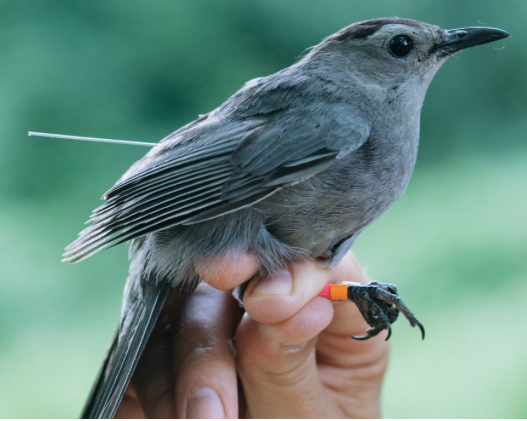
https://nationalzoo.si.edu/migratory-birds/what-bird-banding

In the second step, the scientists return to the forest to trap more birds.  
However, in this second trip they can separately count the number of birds caught that have been tagged and the number of new, untagged birds.
By subtracting the number of tagged birds caught on the second trip from the total number of tagged birds on the first trip, they can work out the number of tagged birds they did not catch on their second trip.

We can now split the total bird population into four groups (pictured below). 

These groups are: 
   * A: the number of tagged birds caught on the second trip (This is directly measured)
   * B: the number of tagged birds missed on the second trip (This is measured as described above) 
   * C: the number of un-tagged birds caught on the second trip (also directly measured)
   * D: the number of birds missed on both trips (unknown)

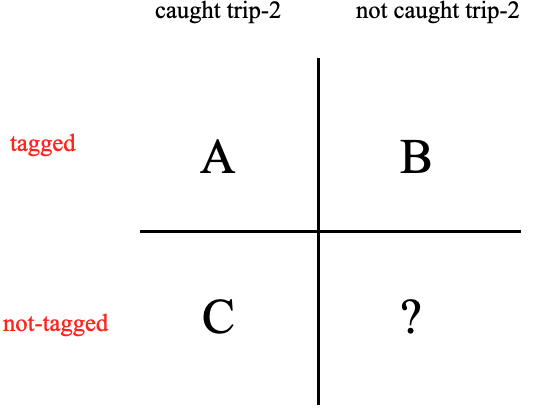

D (indicated by the question mark in the figure is unknown) it is the thing we need to measure but can't observe. 
If we knew D, we could calculate the total population by adding all the categories. 


The ABCD method gives us a way of estimating D from A,B, and C.

The idea is that the ratio, 
$$
\frac{C}{A}
$$ 

tells you how many untagged birds there are for each tagged bird in a collection of birds. In this case the collection is the number of birds caught in the second trip. If -- _and this is the major assumption of the method_ -- we can assume this ratio is the same for all collections of birds, we can calculate the the number of untagged birds, not caught in second trip as:
$$
\frac{C}{A}\times B
$$

Here, B is the number of tagged birds not caught in the second trip and we use our ratio of the number of untagged birds for each tagged bird to predict untagged birds, not caught in second trip.

# Simulated Example

In [1]:
import numpy as np

In [2]:
nBirds = 1000

Assign each bird two random numbers (these we will use to decide if the birds we tagged or caught)

In [3]:
Rand1 = np.random.uniform(size=nBirds)
Rand2 = np.random.uniform(size=nBirds)

Lets assume we catch 30% of birds

In [4]:
fracCaught = 0.2

Use the random numbers to determine if the birds were caught or not in the two trips

In [5]:
tagged1 = (Rand1<fracCaught)
caught2 = (Rand2<fracCaught) 

Ok, now lets work out the counts in categories A, B, C  

In [6]:
nTagged1 = tagged1.sum()
nCaught2 = caught2.sum()
print("Total number tagged in first trip: ",nTagged1)
print("Total number caught in second trip: ",nCaught2)

Total number tagged in first trip:  185
Total number caught in second trip:  205


In [7]:
A = np.logical_and(tagged1, caught2).sum()
print("Number caught in second that have been tagged in the first trip: ",A)

Number caught in second that have been tagged in the first trip:  37


In [8]:
B = nTagged1 - A   
print("Number tagged in the first trip that were missed in the second: ",B)

Number tagged in the first trip that were missed in the second:  148


In [9]:
C = nCaught2 - A   
print("Number caught in the second trip that were not tagged in the first: ",C)

Number caught in the second trip that were not tagged in the first:  168


So our measued ABC? matrix looks like

In [10]:
print("%5i %5s | %5i %5s " % (A, "",B, "") )
print("--------------------------")
print("%5i %5s | %5s %5s " % (C, "","?", "") )

   37       |   148       
--------------------------
  168       |     ?       


The number of birds missed is the predicted to be

In [11]:
D_predicted = C/A*B
D_predicted

672.0

In [12]:
nTotal_predicted = A + B + C + D_predicted
nTotal_predicted

1025.0

Not Bad!

# Real Example

Demo with bag of beans and a marker. Students "catch" a fraction of beans from the bag and tag them with a marker. The beans are then "released" back into the bad and mixed. Students then return and catch another fraction of beans.

Estimate the total number of beans from your measurements. 

# Some Questions

- ### What assumptions are made ? How might these be wrong in real life?

* ### Does the fraction of birds found have to be the same in the two trips? 

* ### Do you expect to get a better or worse estimate if the fraction of birds caught increases?

* ### How could you estimate the uncertianty on your estimate ?

* ### How could you estimate the number of typos you missed in your paper ? 

# Advanced

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Let automate the method.
#
# Give: total number of birds, and the fraction observed
#
# Returns: True number of birds not tagged or caught, and the predicted value
def ABCD(nBirds, fracObserved =0.3, debug = False): 

    # generate random arrays of equal length containing 0's or 1's with prob fracObserved
    Rand1 = np.random.uniform(size=nBirds)
    Rand2 = np.random.uniform(size=nBirds)
    
    tagged1 = (Rand1<fracObserved)
    caught2 = (Rand2<fracObserved)    

    #if debug:
    #print(Obs1)
    #print(Obs2)

    nTagged1 = tagged1.sum()
    nCaught2 = caught2.sum()
    
    A = np.logical_and(tagged1, caught2).sum()
    B = nTagged1 - A   
    C = nCaught2 - A   

    D = nBirds - A - B - C
    D_predicted = C/A*B

    
    if debug:
        print("%5i %5s | %5i %5s " % (A, "",B, "") )
        print("--------------------------")
        print("%5i %5s | %5s %5s " % (C, "","?", "") )
        print("D_predicted:",D_predicted)
        print("D_truth:",D)        
    
    return D, D_predicted


In [15]:
ABCD(1000,0.3, debug=True)

   81       |   213       
--------------------------
  222       |     ?       
D_predicted: 583.7777777777778
D_truth: 484


(484, 583.7777777777778)

In [16]:
def runABCD(nExperiments = 1000, nTot = 1000, obsFrac      = 0.3):
    nTruth=[]
    nPred=[]
    error=[]

    for i in range(nExperiments):
        ABCDRes = ABCD(nTot,obsFrac)
        nTruth.append(ABCDRes[0])
        nPred .append(ABCDRes[1])
        error .append(ABCDRes[0]-ABCDRes[1])
    return error

In [17]:
error_f03 = runABCD(obsFrac=0.3)
error_f05 = runABCD(obsFrac=0.5)
error_f01 = runABCD(obsFrac=0.1)

In [18]:
print(np.average(error_f03))
print(np.std(error_f03))


-5.5749890493551915
75.14979374935571


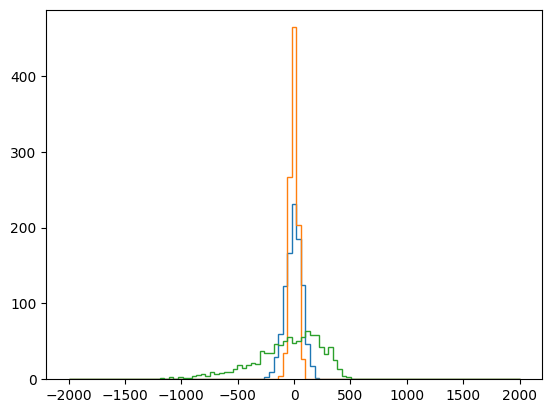

In [19]:
plt.figure()


plt.hist(error_f03,bins=np.linspace(-2000,2000,100),histtype='step')
plt.hist(error_f05,bins=np.linspace(-2000,2000,100),histtype='step')
plt.hist(error_f01,bins=np.linspace(-2000,2000,100),histtype='step')



plt.show()

In [20]:
val=[]
predicted=[]

y_axis= np.arange(10,3000)

# Lets check for arrays of various lengths and save values so that it can be plotted
for i in y_axis:
    ABCDRes = ABCD(i)
    val.append(ABCDRes[0])
    predicted.append(ABCDRes[1])

/var/folders/74/hlh1gt750_x50032_gz_df5h0000gn/T/ipykernel_31403/4133892739.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  D_predicted = C/A*B


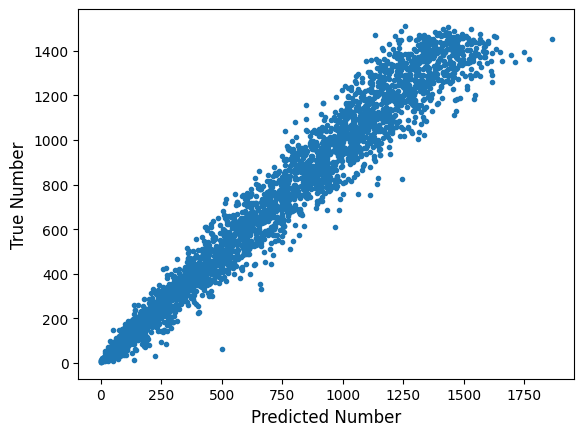

In [21]:
plt.figure()

plt.plot(predicted,val,'.')

plt.ylabel('True Number',fontsize='large') #which is also the given array length
plt.xlabel('Predicted Number',fontsize='large')


plt.show()

In [22]:
error=[]

y_axis= np.linspace(0,1,2000)


for i in y_axis:
    ABCDRes = ABCD(nBirds=1000, fracObserved=i)
    error.append(ABCDRes[0]-ABCDRes[1])


/var/folders/74/hlh1gt750_x50032_gz_df5h0000gn/T/ipykernel_31403/4133892739.py:27: RuntimeWarning: invalid value encountered in scalar divide
  D_predicted = C/A*B
/var/folders/74/hlh1gt750_x50032_gz_df5h0000gn/T/ipykernel_31403/4133892739.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  D_predicted = C/A*B


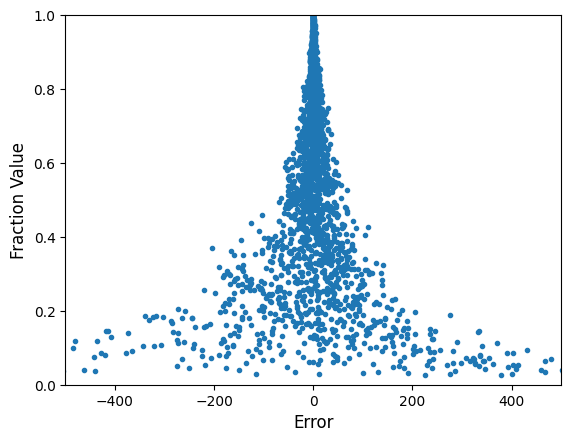

In [23]:
plt.figure()
plt.plot(error,y_axis,'.')

plt.ylabel('Fraction Value',fontsize='large')
plt.xlabel('Error',fontsize='large') 

plt.ylim(0,1)
plt.xlim(-500,500)
plt.show()

# What assumptions are made ?

   * The all the birds are equally likely to be caught
   * No birds die or fly out of the forest between the first and second trips


# How could you estimate the uncertianty on the prediction?

# What else could go wrong?

- If no tagged individuals are recaptured, your result is undefined. 
- The tagging must not harm the individual or affect its survival.
- The tag must not come off.
- There must be no immigration into or emigration out of the population.
- There must be no mortality between the tagging and recapture times.
- The tagging must not make an individual more or less likely to be recaptured.